# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
#Dylon Wilson
#08-21-2024
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

In [2]:
# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
combined_df = pd.merge(study_results, mouse_metadata, how = "inner", on = "Mouse ID")


# Display the data table for preview
combined_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
# Checking the number of mice.
mice_number = combined_df["Mouse ID"].nunique()
mice_number

249

In [4]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint.
duplicate_mice = combined_df[combined_df.duplicated(subset=['Mouse ID', 'Timepoint'], keep=False)]

# Get the unique Mouse IDs of the duplicate mice
duplicate_mouse_ids = duplicate_mice['Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [5]:
# Optional: Get all the data for the duplicate mouse ID.
dupilicated_mouse_data = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)]
dupilicated_mouse_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
new_cleaned_df = combined_df[combined_df['Mouse ID'].isin(duplicate_mouse_ids)==False]
new_cleaned_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
#new_mice_number = new_cleaned_df["Mouse ID"].nunique()
#new_mice_number
test = len(new_cleaned_df["Mouse ID"].unique())
test


248

## Summary Statistics

In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Use groupby and summary statistical methods to calculate the following properties of each drug regimen:
# mean, median, variance, standard deviation, and SEM of the tumor volume.
grouped_df = new_cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)']

summary_stats_df = pd.DataFrame({
    'Mean Tumor Volume': grouped_df.mean(),
    'Median Tumor Volume': grouped_df.median(),
    'Tumor Volume Variance': grouped_df.var(),
    'Tumor Volume Std Dev': grouped_df.std(),
    'Tumor Volume Std Err': grouped_df.sem()})
summary_stats_df



,Mean Tumor Volume,Median Tumor Volume,Tumor Volume Variance,Tumor Volume Std Dev,Tumor Volume Std Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
# A more advanced method to generate a summary statistics table of mean, median, variance, standard deviation,
# and SEM of the tumor volume for each regimen (only one method is required in the solution)

# Using the aggregation method, produce the same summary statistics in a single line
summary_stats = new_cleaned_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].agg(
                                        Mean_Tumor_Volume = 'mean',
                                        Median_Tumor_Volume ='median',
                                        Tumor_Volume_Variance ='var',
                                        Tumor_Volume_Std_Dev ='std',
                                        Tumor_Volume_Std_Err ='sem'
)
summary_stats

,Mean_Tumor_Volume,Median_Tumor_Volume,Tumor_Volume_Variance,Tumor_Volume_Std_Dev,Tumor_Volume_Std_Err
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: xlabel='Drug Regimen', ylabel='Number of Obeserverd Mouse Timepoints'>

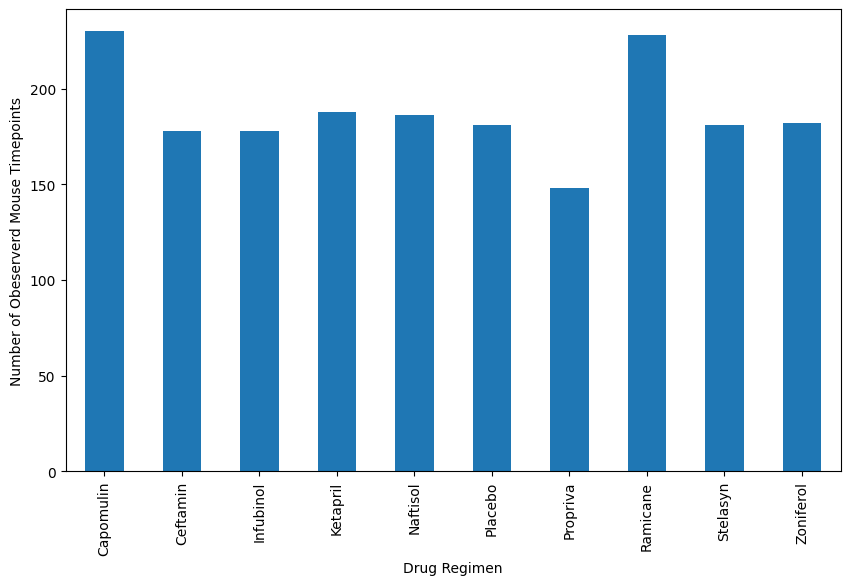

In [10]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
mice_bar_plot = new_cleaned_df.groupby('Drug Regimen')['Mouse ID'].count()
mice_bar_plot.plot(kind='bar', figsize=(10,6), ylabel="Number of Obeserverd Mouse Timepoints", xlabel="Drug Regimen")



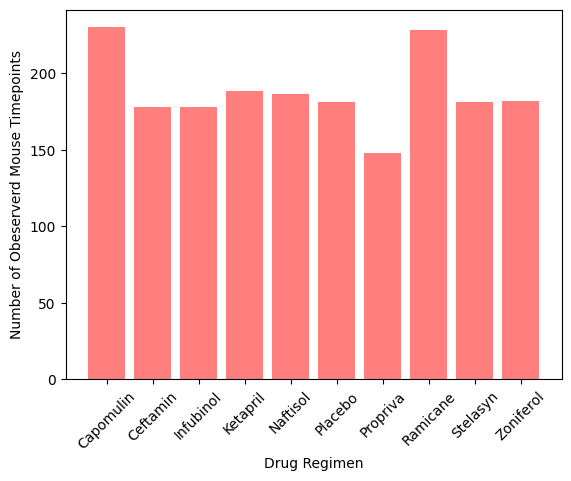

In [11]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regiment_counts = new_cleaned_df.groupby('Drug Regimen')['Mouse ID'].size()
plt.bar(regiment_counts.index, regiment_counts.values, color='r', alpha=0.5, align="center")
plt.xlabel('Drug Regimen')
plt.ylabel('Number of Obeserverd Mouse Timepoints')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()


<Axes: ylabel='Mouse ID'>

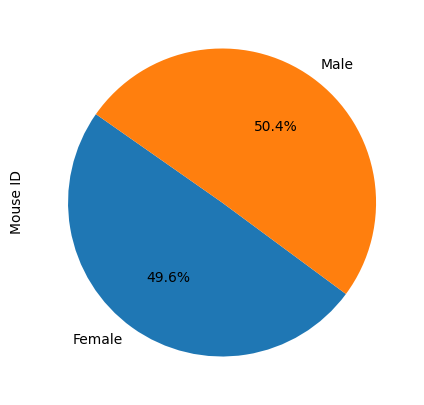

In [12]:
# Generate a pie chart, using Pandas, showing the distribution of unique female versus male mice used in the study
# Get the unique mice with their gender
gender_counts = new_cleaned_df.groupby('Sex')['Mouse ID'].nunique()
gender_counts

# Make the pie chart
gender_counts.plot(kind='pie', figsize=(5,5), autopct='%1.1f%%', startangle=145) 


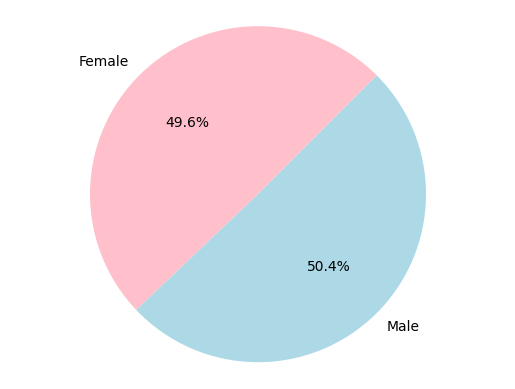

In [13]:
# Generate a pie chart, using pyplot, showing the distribution of unique female versus male mice used in the study

# Get the unique mice with their gender
mice_genders = new_cleaned_df.groupby('Sex')['Mouse ID'].nunique()
mice_genders

# Make the pie chart
plt.pie(mice_genders.values, labels=mice_genders.index, autopct='%1.1f%%', startangle=45, colors=['pink','lightblue'])
plt.axis('equal')
plt.show()


## Quartiles, Outliers and Boxplots

In [14]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
greatest_timepoint_df = new_cleaned_df.groupby('Mouse ID')['Timepoint'].max().reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
merged_df = pd.merge(greatest_timepoint_df, new_cleaned_df, how='left', on=['Mouse ID', 'Timepoint'])
merged_df


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
final_tumor_volumes = merged_df[merged_df['Drug Regimen'].isin(treatments)][['Mouse ID', 'Drug Regimen', 'Tumor Volume (mm3)']]

# Create empty list to fill with tumor vol data (for plotting)
tumor_vol_data = []

# Loop through each drug in the treatments list
for treatment in treatments:
    # Filter the final tumor volumes DataFrame for the current treatment
    treatment_volumes = final_tumor_volumes[final_tumor_volumes['Drug Regimen'] == treatment]['Tumor Volume (mm3)']
    
    # Append the tumor volumes to the list
    tumor_vol_data.append(treatment_volumes)
    
    # Calculate the quartiles and IQR
    quartiles = treatment_volumes.quantile([0.25, 0.75])
    lower_q = quartiles[0.25]
    upper_q = quartiles[0.75]
    iqr = upper_q - lower_q
    
    # Determine potential outliers using upper and lower bounds
    lower_bound = lower_q - 1.5 * iqr
    upper_bound = upper_q + 1.5 * iqr
    outliers = treatment_volumes[(treatment_volumes < lower_bound) | (treatment_volumes > upper_bound)]
    
    print(f"Potential outliers for {treatment}: {outliers}")




Potential outliers for Capomulin: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Ramicane: Series([], Name: Tumor Volume (mm3), dtype: float64)
Potential outliers for Infubinol: 31    36.321346
Name: Tumor Volume (mm3), dtype: float64
Potential outliers for Ceftamin: Series([], Name: Tumor Volume (mm3), dtype: float64)


/var/folders/pf/rq8ybzh95t78nqss6hk6407c0000gn/T/ipykernel_51982/3863397806.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(data, labels=treatments, patch_artist=True, notch=False, vert=90)


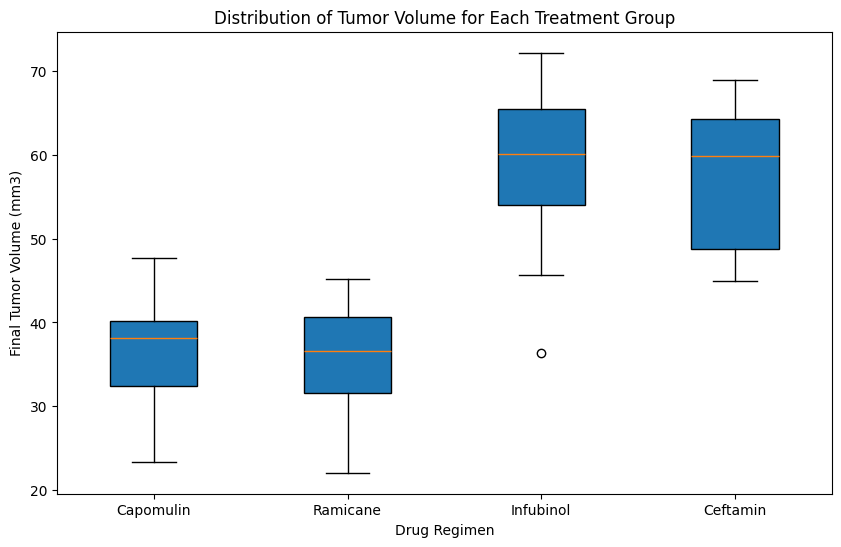

In [16]:
# Generate a box plot that shows the distribution of the tumor volume for each treatment group.
data = [tumor_vol_data[i] for i in range(len(treatments))]

# Create a box plot
plt.figure(figsize=(10, 6))
plt.boxplot(data, labels=treatments, patch_artist=True, notch=False, vert=90)

plt.xlabel('Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Distribution of Tumor Volume for Each Treatment Group')

plt.show()

## Line and Scatter Plots

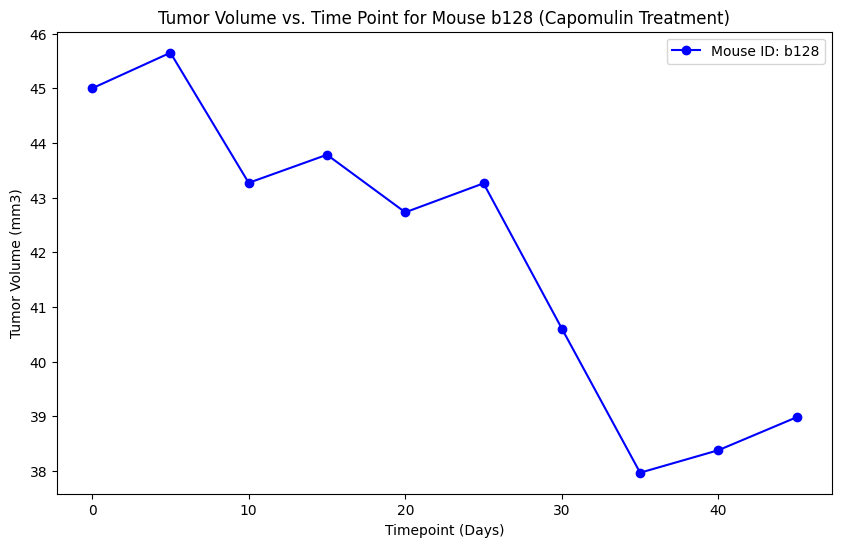

In [17]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin

chosen_mouse = 'b128'

cmouse_data = new_cleaned_df[(new_cleaned_df['Mouse ID'] == chosen_mouse) & (new_cleaned_df['Drug Regimen'] == 'Capomulin')]

plt.figure(figsize=(10, 6))
plt.plot(cmouse_data['Timepoint'], cmouse_data['Tumor Volume (mm3)'], marker='o', color='b', label=f'Mouse ID: {chosen_mouse}')

# Add labels and title
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.title(f'Tumor Volume vs. Time Point for Mouse {chosen_mouse} (Capomulin Treatment)')
plt.legend()

# Show the plot
plt.show()

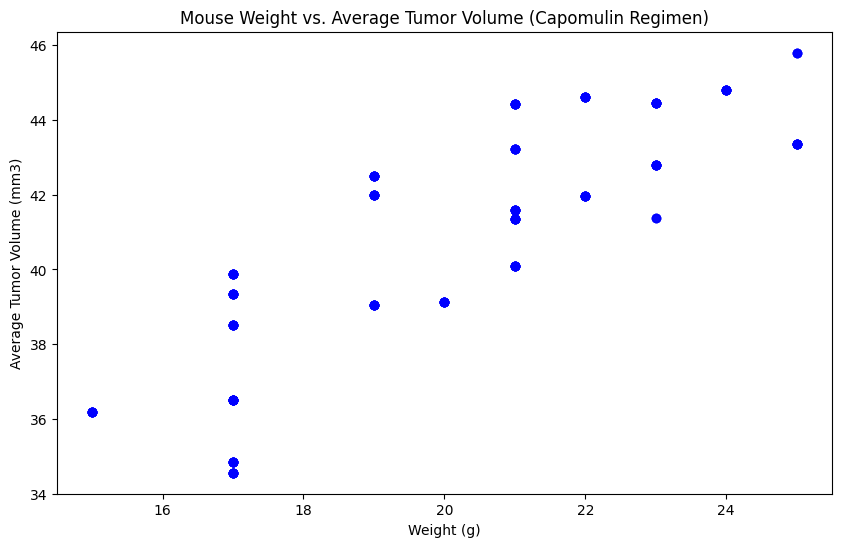

In [18]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen

capomulin_data = new_cleaned_df[new_cleaned_df['Drug Regimen'] == 'Capomulin']

avg_tumor_volume = capomulin_data.groupby('Mouse ID')['Tumor Volume (mm3)'].mean().reset_index()

scatter_merge_df = pd.merge(avg_tumor_volume, capomulin_data[['Mouse ID', 'Weight (g)']], on='Mouse ID', how = "left")

plt.figure(figsize=(10, 6))
plt.scatter(scatter_merge_df['Weight (g)'], scatter_merge_df['Tumor Volume (mm3)'], color='b', alpha=0.7)

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.title('Mouse Weight vs. Average Tumor Volume (Capomulin Regimen)')

plt.show()


## Correlation and Regression

The correlation between mouse weight and the average tumor volume is 0.83


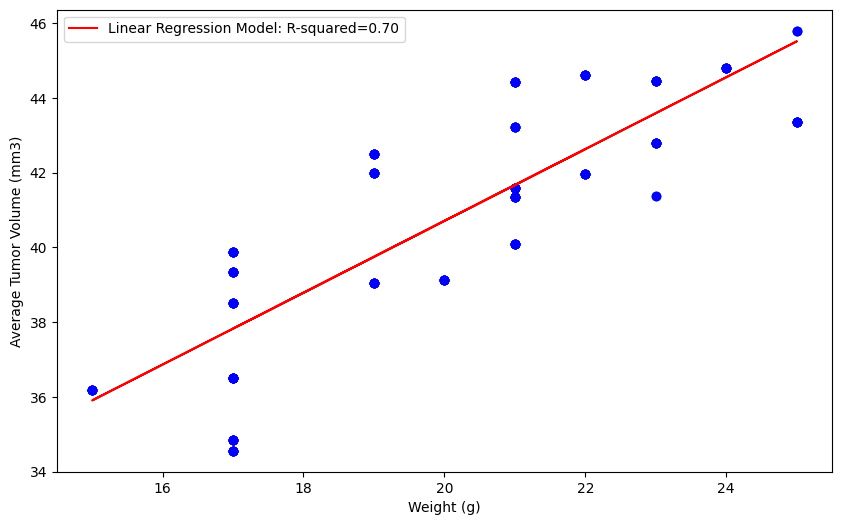

In [19]:
# Calculate the correlation coefficient and a linear regression model
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
correlation_coef = round(st.pearsonr(scatter_merge_df['Weight (g)'], scatter_merge_df['Tumor Volume (mm3)'])[0], 2)

(slope, intercept, r_value, p_value, std_err) = st.linregress(scatter_merge_df['Weight (g)'], scatter_merge_df['Tumor Volume (mm3)'])

r_square = r_value**2

print(f"The correlation between mouse weight and the average tumor volume is {correlation_coef}")

plt.figure(figsize=(10, 6))


plt.scatter(scatter_merge_df['Weight (g)'], scatter_merge_df['Tumor Volume (mm3)'], color='b', alpha=0.7)
plt.plot(scatter_merge_df['Weight (g)'], slope*scatter_merge_df['Weight (g)'] + intercept, color='r', label=f'Linear Regression Model: R-squared={r_squared:.2f}')

plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.legend()

plt.show()

